# 단순선형회귀 Keras

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X_data = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
y_data = [5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

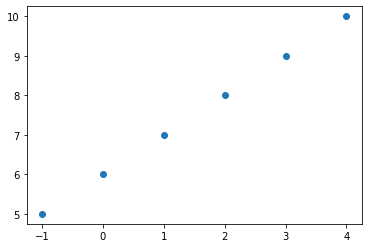

In [ ]:
plt.plot(X_data, y_data,'o')
plt.show()

## 모델 만들기

In [ ]:
from tensorflow.keras import layers


model = tf.keras.Sequential([
    layers.Dense(1,input_dim = 1)   # 모델안에 유닛을 1개 , 유닛 안에 값은 1개 들어감
])

In [ ]:
model.summary()
# Dense 레이어, 유닛 1개, 출력 1개


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate = 0.01)  # 옵티마이저
mse = tf.keras.losses.MeanSquaredError()  # cost function

model.compile(optimizer=sgd, loss = mse)



In [ ]:
history = model.fit(X_data,y_data, epochs=300, verbose=1)


In [ ]:
history.history.keys()

dict_keys(['loss'])

In [ ]:
loss = history.history['loss']
loss[:10]

[52.101348876953125,
 43.9820556640625,
 37.53275680541992,
 32.39857482910156,
 28.300302505493164,
 25.018251419067383,
 22.379545211791992,
 20.24814796447754,
 18.51702308654785,
 17.101924896240234]

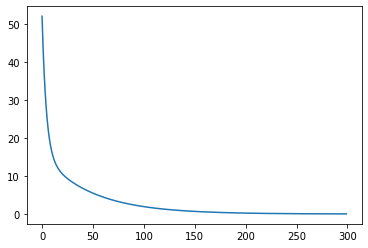

In [ ]:
plt.plot(range(300), loss)
plt.show()

In [23]:
model.get_weights()    # 1.0748414 : W, 5.7679667 : b

[array([[1.0748414]], dtype=float32), array([5.7679667], dtype=float32)]

In [24]:
y_pred = model.predict(X_data)

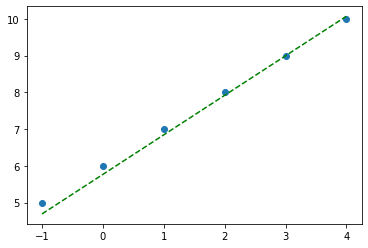

In [25]:
plt.plot(X_data, y_data, 'o')
plt.plot(X_data, y_pred, 'g--')
plt.show()

## 점수 예측

In [27]:
data = pd.read_csv('/content/student_scores.csv')
data.shape

(25, 2)

In [28]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
X = data.Hours
y = data.Scores

In [31]:
model = tf.keras.Sequential([
    layers.Dense(1,input_dim = 1)
])

In [32]:
sgd = tf.keras.optimizers.SGD(learning_rate = 0.01)  # 옵티마이저
mse = tf.keras.losses.MeanSquaredError()  # cost function

model.compile(optimizer=sgd, loss = mse)

In [ ]:
history = model.fit(X,y, epochs=300, verbose=1)

In [34]:
loss = history.history['loss']
loss[:10]

[3834.778076171875,
 519.472900390625,
 92.20272827148438,
 37.136329650878906,
 30.03876495361328,
 29.12334632873535,
 29.00467300415039,
 28.988676071166992,
 28.985923767089844,
 28.984891891479492]

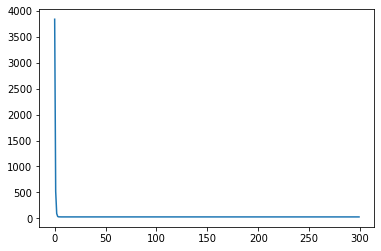

In [35]:
plt.plot(range(300), loss)
plt.show()

In [36]:
y_pred = model.predict(X)

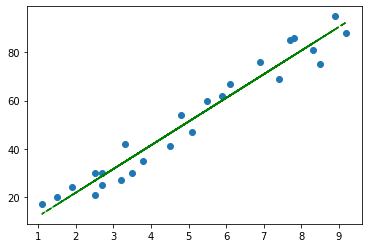

In [37]:
plt.plot(X, y, 'o')
plt.plot(X, y_pred, 'g--')
plt.show()

In [38]:
X_test = [8.2,7.0,6.5]

model.predict(X_test)

array([[82.72197 ],
       [70.94509 ],
       [66.038055]], dtype=float32)

#### 다른 모델 ..?

In [ ]:
model = tf.keras.Sequential([
    layers.Dense(1,input_dim = 1, activation = 'relu')
])
adam = tf.keras.optimizers.Adam(learning_rate = 0.01)  # 옵티마이저
mse = tf.keras.losses.MeanSquaredError()  # cost function

model.compile(optimizer=adam, loss = mse)

history = model.fit(X,y, epochs=300, verbose=1)

y_pred = model.predict(X)

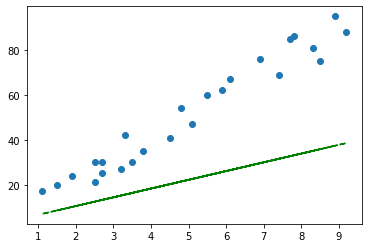

In [43]:
plt.plot(X, y, 'o')
plt.plot(X, y_pred, 'g--')
plt.show()

In [44]:
X_test = [8.2,7.0,6.5]

model.predict(X_test)

array([[34.65322 ],
       [29.980755],
       [28.033894]], dtype=float32)